# Multi linear Regression

# Model for Startups

In [3]:
#importing the requried libs

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [4]:
#Startups problem
#reading the datasets
df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
#finding data types of variables and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

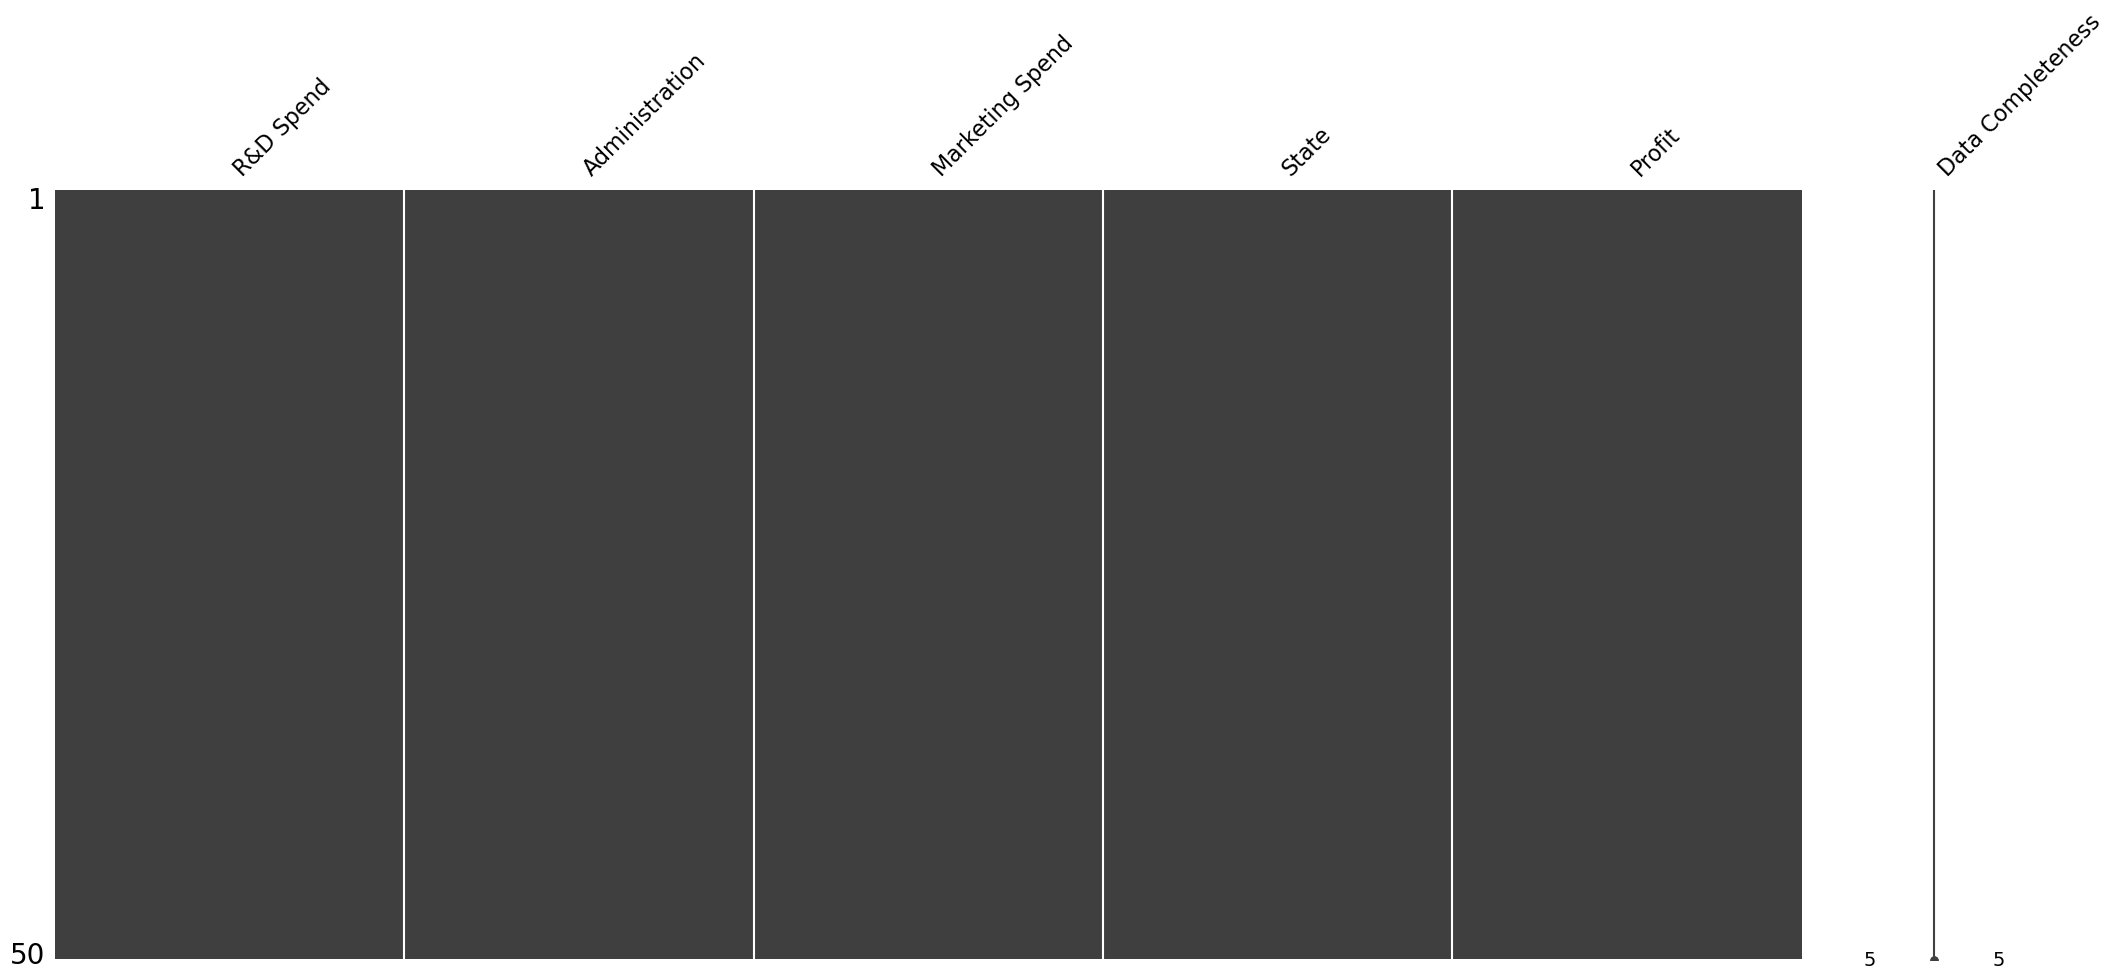

In [8]:
#finding null values
import missingno as msno

msno.matrix(df, labels=True, sort="descending");
df.isnull().sum()

In [9]:
from sklearn.preprocessing import LabelEncoder

df['State']=LabelEncoder().fit_transform(df['State'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     int32  
 4   Profit           50 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 1.9 KB


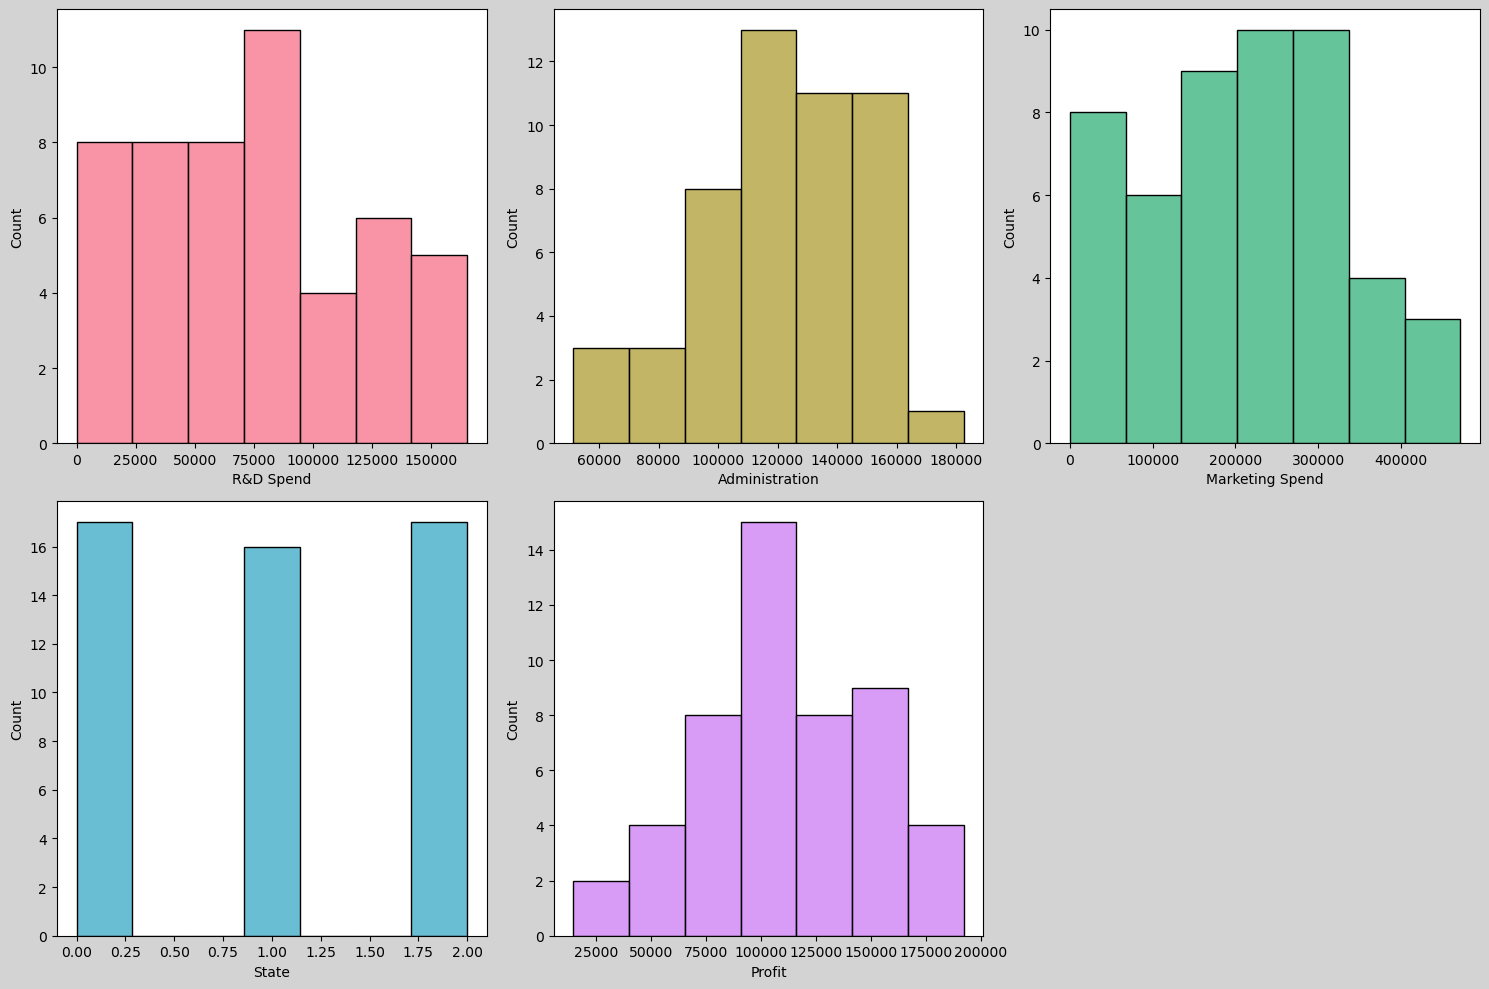

In [12]:
#performing univerent analysis
import matplotlib.pyplot as plt
c=3
r=2
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,10),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.histplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

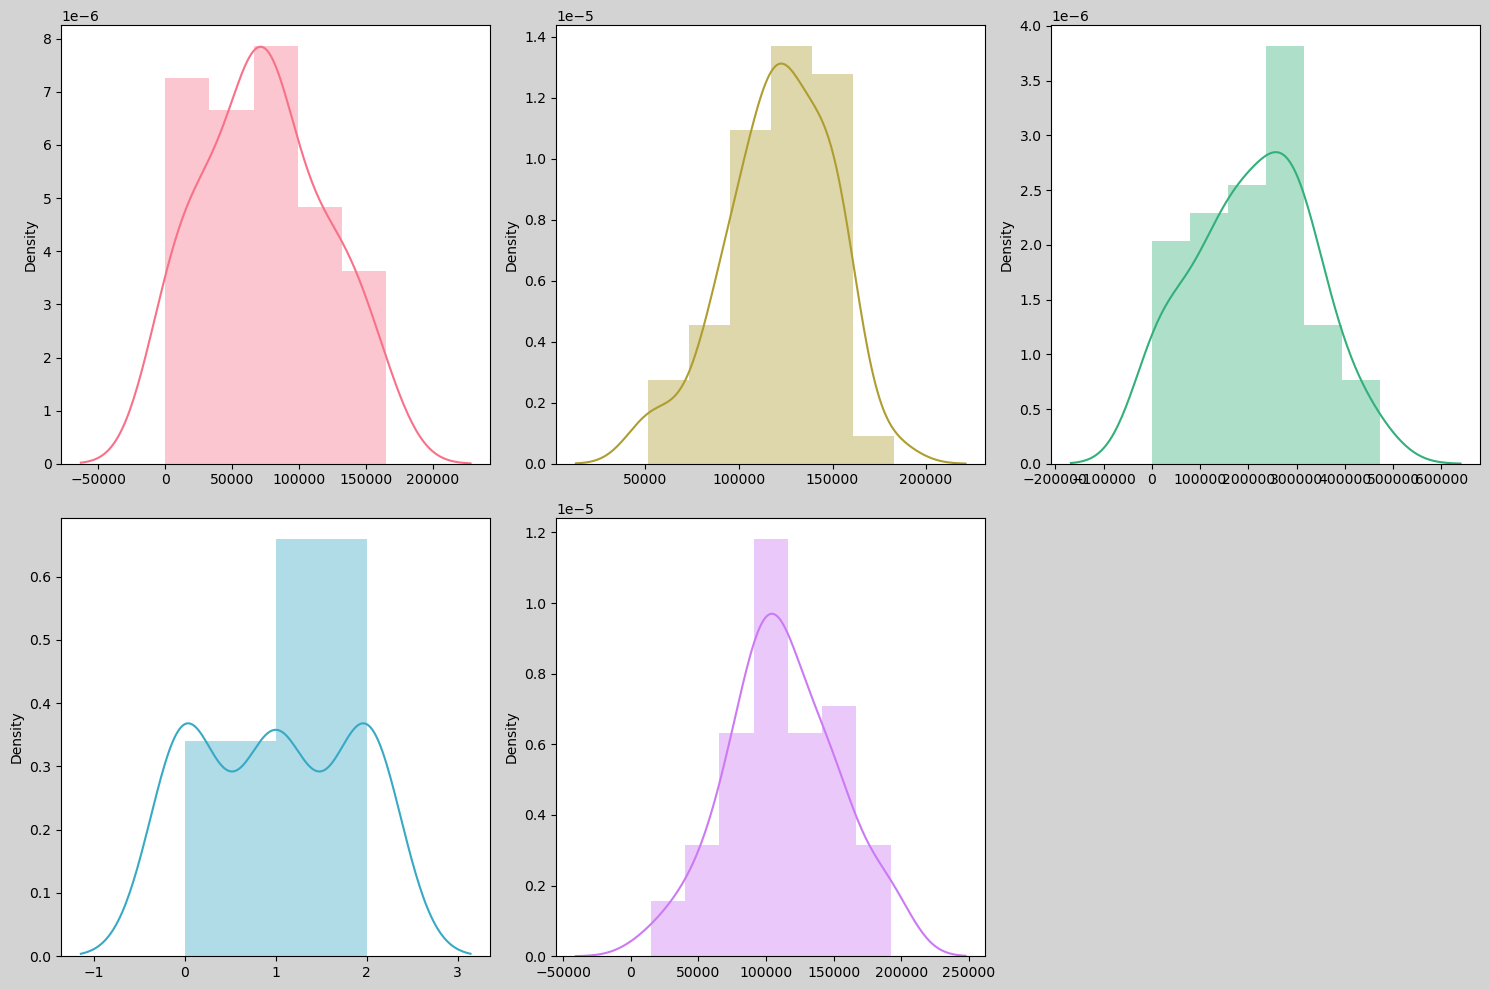

In [15]:
#performing univerent analysis
from warnings import filterwarnings

filterwarnings('ignore')#ignoreing the error
import matplotlib.pyplot as plt
c=3
r=2
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,10),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.distplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

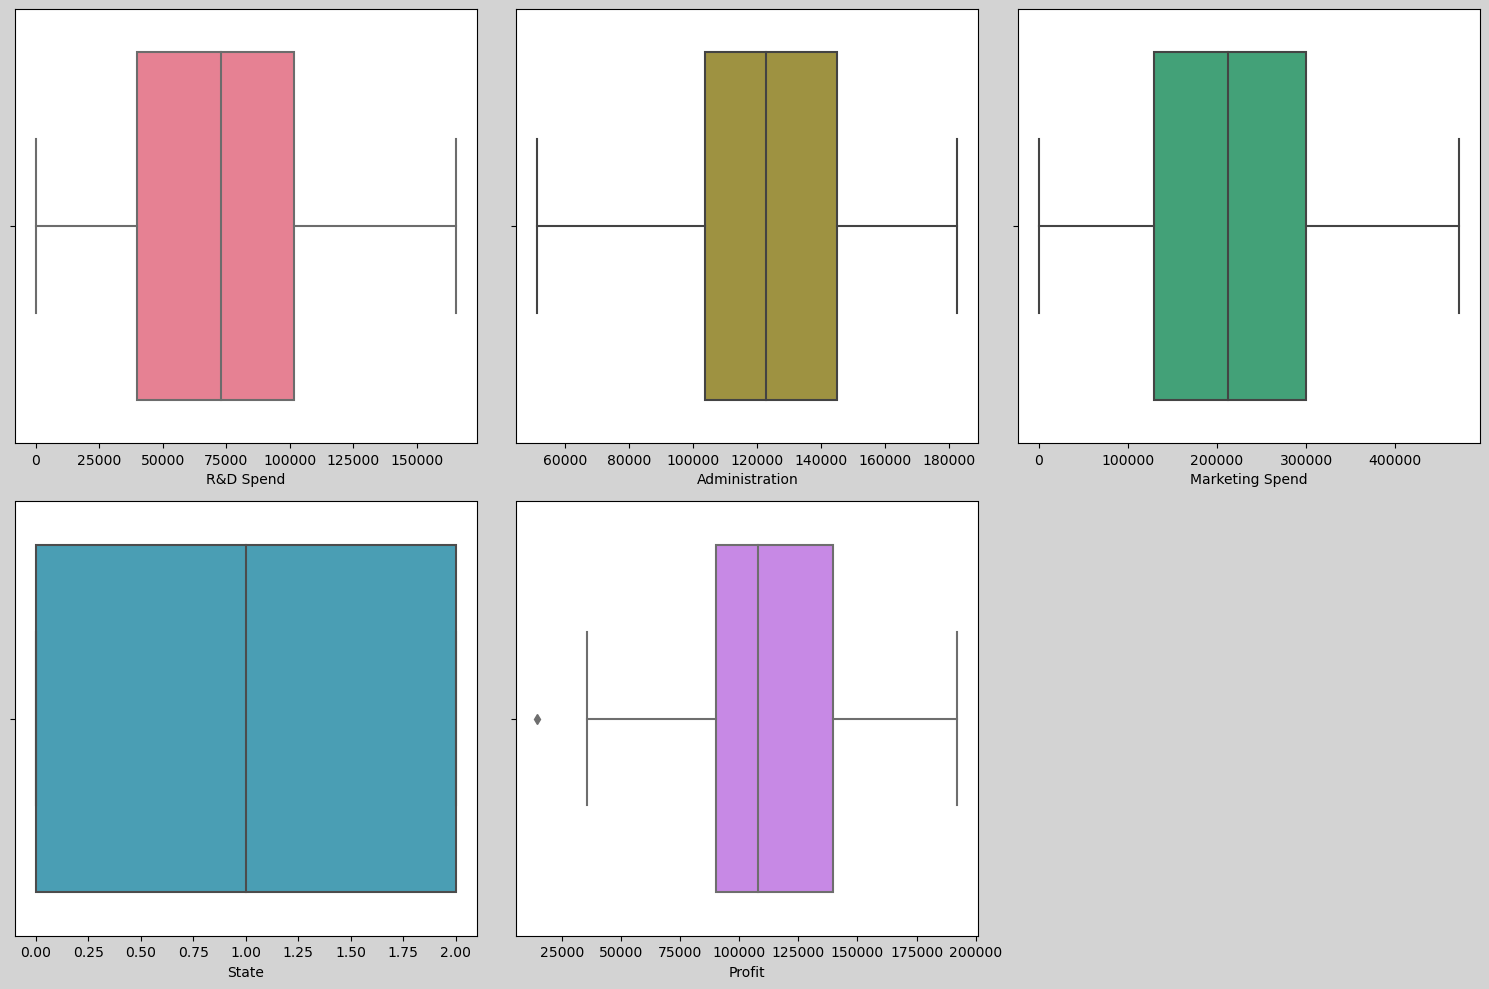

In [14]:
#performing univerent analysis
import matplotlib.pyplot as plt
c=3
r=2
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,10),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

In [16]:
#from above plots i found that data's are almost normally distributed

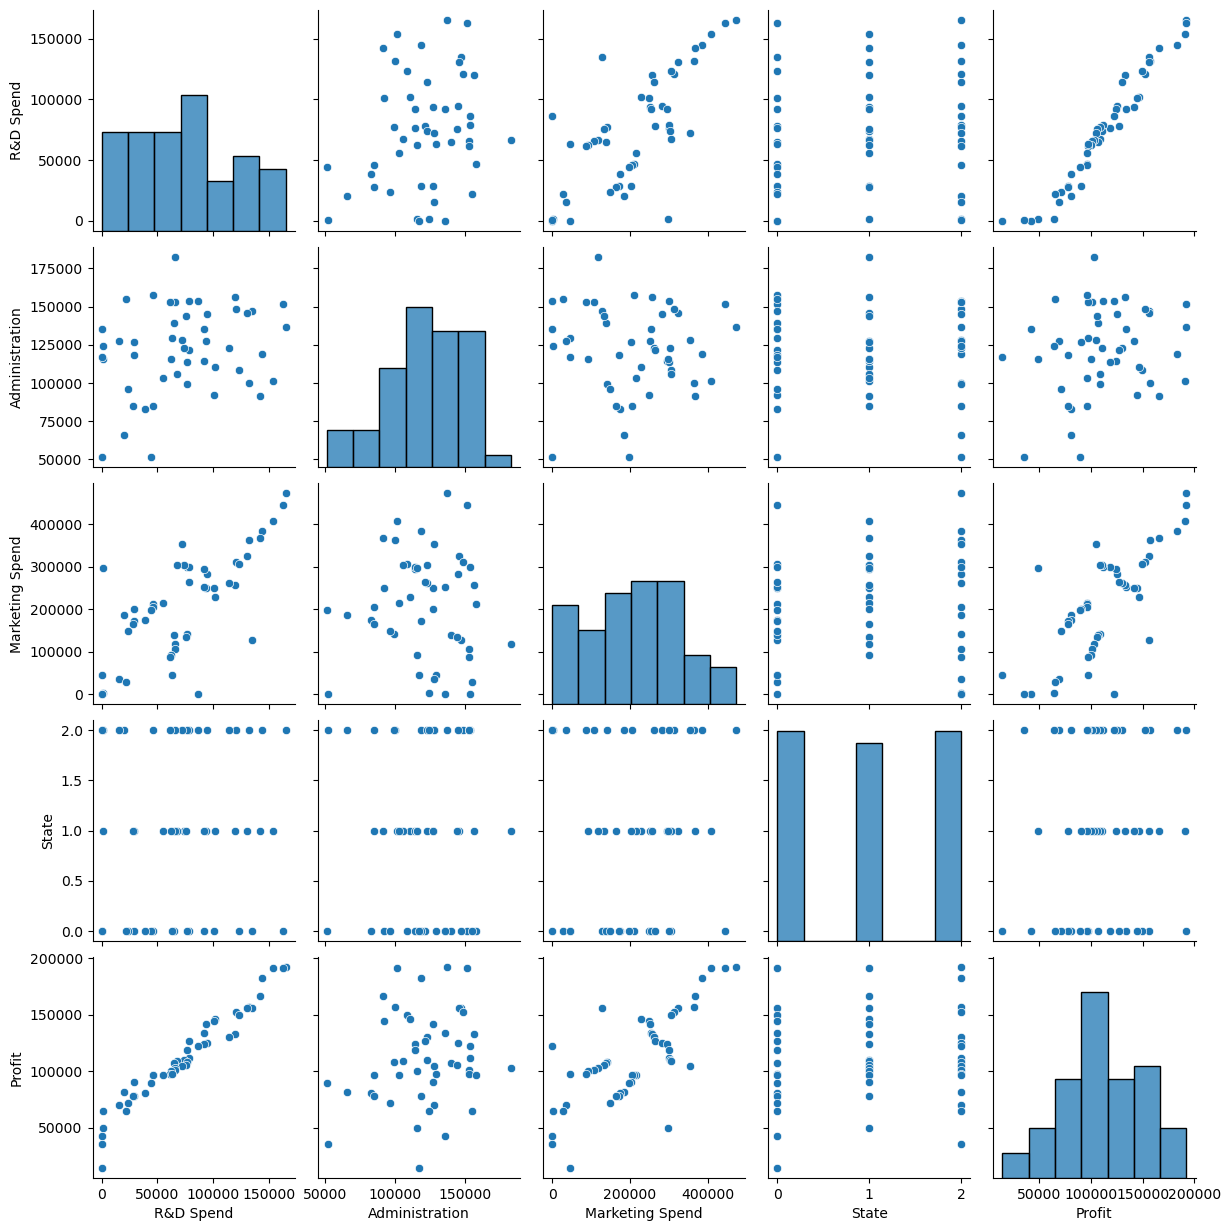

In [18]:
sns.pairplot(df)

<AxesSubplot:>

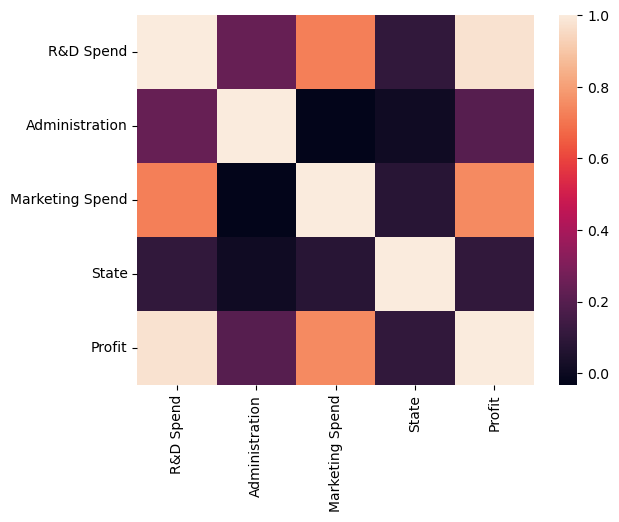

In [19]:
#checking the co relation of all the variables present in datasets
sns.heatmap(df.corr())#visualizing using heatmap feel great 

In [27]:
#checking the values of correlation
df.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


In [28]:
df.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


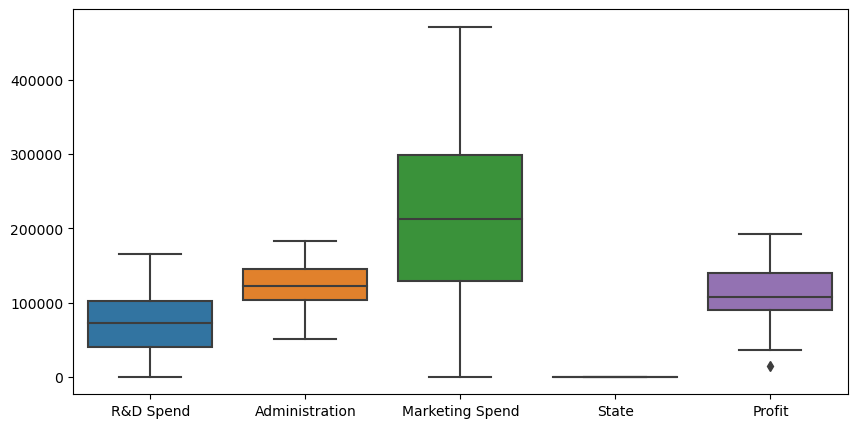

In [29]:
#detecting wheather outlier exist or not in all the variables
plt.figure(figsize=(10,5))
sns.boxplot(data=df);

In [38]:
#droping the outlier
q1=np.quantile(df['Profit'],.25)
q3=np.quantile(df['Profit'],.75)
iqr=q3-q1
lq=q1-1.5*iqr
uq=q3+1.5*iqr

df['Profit']=df['Profit'][(df.Profit>lq) & (df.Profit<uq)]

In [39]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             1
dtype: int64

In [40]:
df=df.dropna()

In [73]:
#Standardizing the data using Standard Scaler

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

#applying scaler for the data to fine tune

standard=scaler.fit_transform(df.iloc[:,0:3])

#spliting the data as independent and dependent variable

x=standard
y=df.iloc[:,-1]

#Spliting the data as Train and Test

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.35,random_state=0)

In [74]:
#size of train
X_train.shape

(31, 3)

In [75]:
# shape of test
X_test.shape

(18, 3)

In [76]:
#Building the Model

model=LinearRegression()

#inserting both x and y train to train the model(applying the standardized values for the model)

model.fit(X_train,y_train)

LinearRegression()

In [77]:
#Evaluting the model by predicting some test

ypred=model.predict(X_test)
ypred

array([103376.28243017, 172303.98855395, 112114.8751923 , 102851.52549718,
       102314.90144806,  94803.83589064,  89523.58475682,  77643.08948524,
       158539.28345036, 136987.02600762, 137633.36216985,  99561.44917687,
       100541.79560046, 114176.20984918,  57191.19901752, 181262.95126944,
        58093.95193502, 129741.18866539])

In [78]:
#importing the r2 score to find accuracy
from sklearn.metrics import r2_score

#predicting the model for traing data
ypred_train=model.predict(X_train)

#finding the Training accuracy of the model
print('Training Accuracy',r2_score(y_train,ypred_train))


Training Accuracy 1.0


In [79]:
# finding Test accuracy by using r2 score
print('Test Accuracy',r2_score(y_test,ypred))

Test Accuracy 0.9999999999999999


In [80]:
#creating new dataframe to show the prediction v/s actual v/s Difference b/w them
new_df=pd.DataFrame({'y-predict':ypred,'y-actual':y_test,'Difference':y_test-ypred})
new_df

,y-predict,y-actual,Difference
29,103376.282430,103376.282,-0.000430
4,172303.988554,172303.989,0.000446
26,112114.875192,112114.875,-0.000192
30,102851.525497,102851.526,0.000503
32,102314.901448,102314.901,-0.000448
37,94803.835891,94803.836,0.000109
34,89523.584757,89523.585,0.000243
40,77643.089485,77643.090,0.000515
7,158539.283450,158539.283,-0.000450
10,136987.026008,136987.026,-0.000008


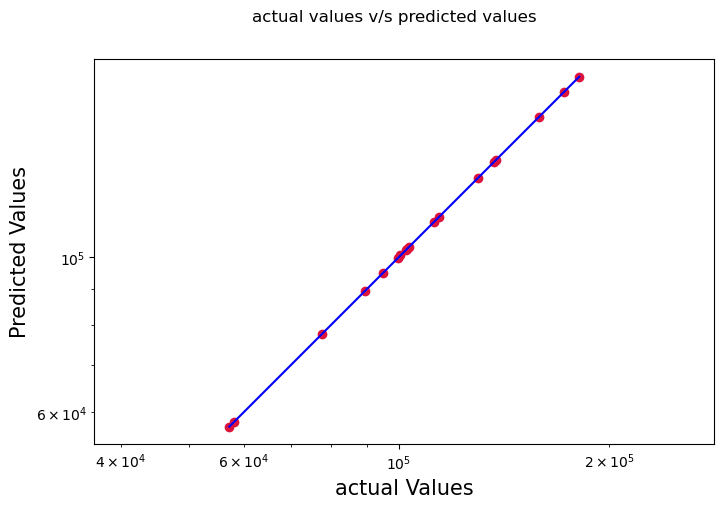

In [81]:
#ploting actual v/s predicted values for only test sets
plt.figure(figsize=(8,5))
plt.scatter(new_df['y-actual'],new_df['y-predict'], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(new_df['y-predict']), max(new_df['y-actual']))
p2 = min(min(new_df['y-predict']), min(new_df['y-actual']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.suptitle('actual values v/s predicted values')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


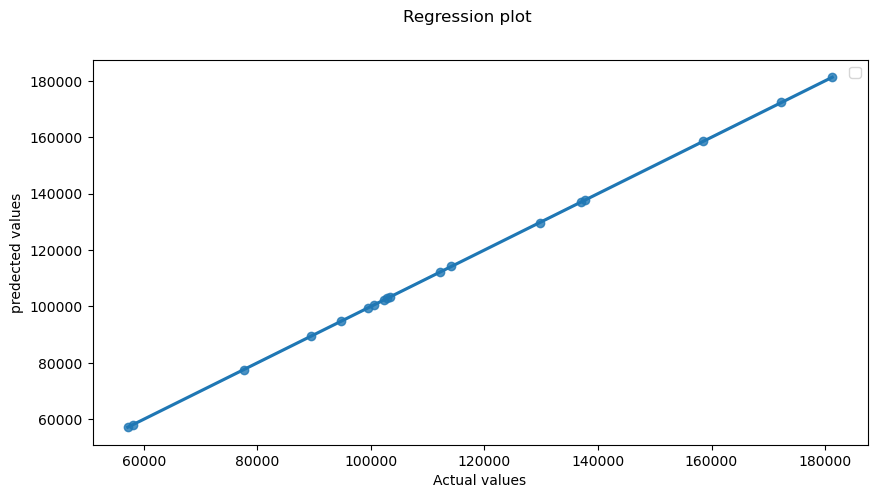

In [82]:
#ploting the regression plot for only tested or predicted data over created model
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')#ignoreing the error


plt.figure(figsize=(10,5))
sns.regplot(y_test,ypred);
plt.xlabel('Actual values')
plt.ylabel('predected values')
plt.suptitle('Regression plot')
plt.legend()



In [83]:
#using the model i am predicting the overall independent variables present in the datasets

overallpred=model.predict(x)
p=pd.Series(overallpred)
p.head()

0    189227.821065
1    185604.846257
2    181262.951269
3    172479.547697
4    172303.988554
dtype: float64

In [84]:
#difference b/w actual and predictions

new_df=pd.DataFrame({'y-predict':p,'y-actual':y,'Difference':y-p})
new_df.head()

,y-predict,y-actual,Difference
0,189227.821065,189227.821,-0.000065
1,185604.846257,185604.846,-0.000257
2,181262.951269,181262.951,-0.000269
3,172479.547697,172479.548,0.000303
4,172303.988554,172303.989,0.000446


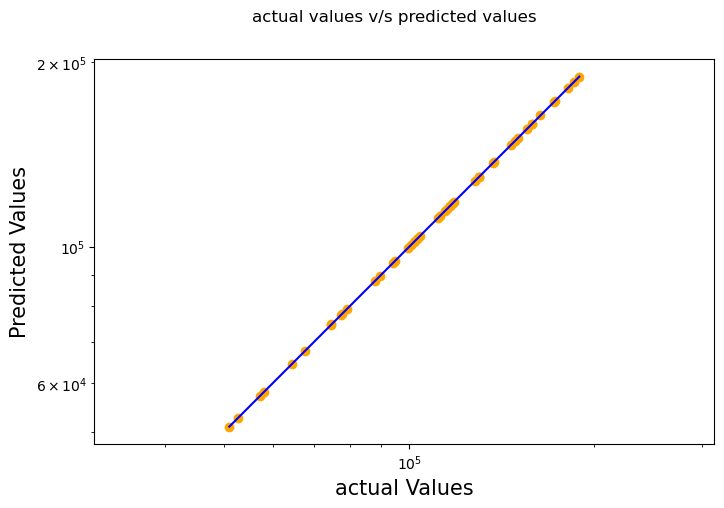

In [85]:
#ploting actual v/s predicted values for whole datasets
plt.figure(figsize=(8,5))
plt.scatter(new_df['y-actual'],new_df['y-predict'], c='orange')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(new_df['y-predict']), max(new_df['y-actual']))
p2 = min(min(new_df['y-predict']), min(new_df['y-actual']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.suptitle('actual values v/s predicted values')
plt.show()

In [86]:
#here i am creating new column as predicted values to compare with actual ones
df['Predicted values']=np.round(p,3)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Predicted values
0,165349.20,136897.80,471784.10,2,192261.83,189227.821
1,162597.70,151377.59,443898.53,0,191792.06,185604.846
2,153441.51,101145.55,407934.54,1,191050.39,181262.951
3,144372.41,118671.85,383199.62,2,182901.99,172479.548
4,142107.34,91391.77,366168.42,1,166187.94,172303.989


<AxesSubplot:xlabel='Predicted values'>

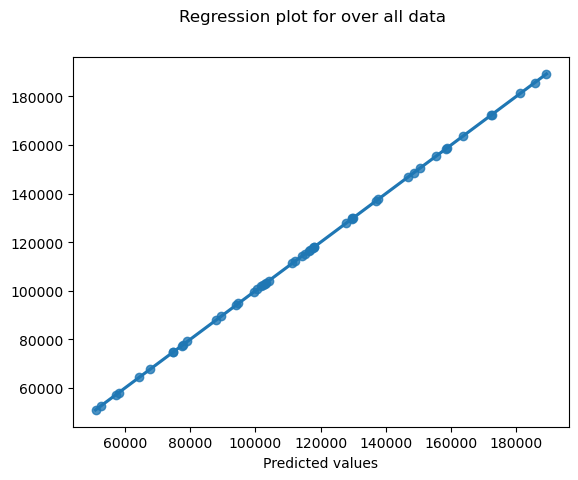

In [87]:
#lets plot the overall prediction
plt.suptitle('Regression plot for over all data')
sns.regplot(y,p)

In [88]:
#building the model by using ols method
import statsmodels.formula.api as smf
model1=smf.ols('y~x',data=df).fit()

In [89]:
#accuracy of the model
model1.rsquared,model1.rsquared_adj

(1.0, 1.0)

In [90]:
#pvalues
print(model1.pvalues)

Intercept     0.000000e+00
x[0]          0.000000e+00
x[1]         6.212180e-309
x[2]         2.601142e-302
dtype: float64


In [91]:
#T-values
print(model1.tvalues)

Intercept    4.326531e+08
x[0]         5.791708e+08
x[1]        -4.519012e+07
x[2]         3.220251e+07
dtype: float64


In [92]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.808e+17
Date:                Tue, 30 May 2023   Prob (F-statistic):               0.00
Time:                        18:25:02   Log-Likelihood:                 333.95
No. Observations:                  49   AIC:                            -659.9
Df Residuals:                      45   BIC:                            -652.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.679e+04      0.000   4.33e+08      0.000    5.68e+04    5.68e+04
x[0]        1.309e+05      0.000   5.79e+08      0.000    1.31e+05    1.31e+05
x[1]       -9090.5045      0.000  -4.52e+07      0.000   -9090.505   -9090.504
x[2]        7502.2043      0.000   3.22e+07      0.000    7502.204    7502.205
==============================================================================
Omnibus:                        2.302   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                1.716
Skew:                           0.274   Prob(JB):                        0.424
Kurtosis:                       2.265   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

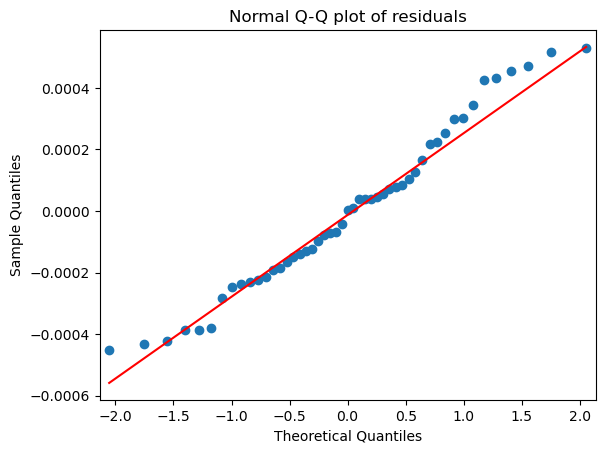

In [93]:
import statsmodels.api as sm
qqplot = sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()